In [1]:
!pip install fabio
import fabio
import math
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 MB 9.7 MB/s eta 0:00:00


In [16]:
def view_cbf(file_path):
    try:
        # Load the .cbf file
        image = fabio.open(file_path)

        # Print the data
        print("\nData:")
        print(image.data)

        return image.data, image.data.shape[1], image.data.shape[0]  # Return image data and dimensions

    except Exception as e:
        print("Error:", e)
        return None, None, None

In [17]:
def find_center(dimensions):
    if dimensions is None:
        return None

    # Calculate center coordinates
    #center_x = dimensions[0] // 2
    #center_y = dimensions[1] // 2
    center_x = 1568
    center_y = 1628
    return (center_x, center_y)

In [18]:
def calculate_distance_and_intensity(image_data, width, height):
    results = []
    center_x, center_y = find_center((width, height))

    for x in range(width):
        for y in range(height):
            intensity = image_data[y, x]  # Note: FabIO uses (y, x) indexing
            distance = round(math.sqrt((center_x - x) ** 2 + (center_y - y) ** 2))
            results.append((x, y, intensity, distance))

    return results

In [19]:
def calculate_sum_of_intensity(results):
    max_distance = int(math.sqrt(2) * 1628)  # Calculate the maximum distance
    sumOfIntensity = np.zeros(max_distance + 1)  # Create an array to store sum of intensities

    for result in results:
        distance = result[3]
        intensity = result[2]
        sumOfIntensity[distance] += intensity  # Add intensity to the corresponding distance in sumOfIntensity

    return sumOfIntensity

In [20]:
def plot_intensity_values(sumOfIntensity):
    plt.plot(sumOfIntensity)
    plt.title('Intensity at Each Pixel for Different Distances')
    plt.xlabel('Distance')
    plt.ylabel('Intensity')
    plt.show()

In [21]:
if __name__ == "__main__":
    # Specify the path to the .cbf file
    file_path = "snap_0_00004.cbf"

    # Call the function to view the .cbf file
    view_cbf(file_path)

    # Call the function to view the .cbf file and get data and dimensions
    image_data, dim_x, dim_y = view_cbf(file_path)

    # Print the size of the image
    print("\nImage size:", dim_x, "x", dim_y)

    # Calculate and print the center coordinates
    center_coords = find_center((dim_x, dim_y))
    if center_coords:
        print("Center coordinates:", center_coords)

    # Calculate distances and intensities
    results = calculate_distance_and_intensity(image_data, dim_x, dim_y)

    # Print the results giant chunk
    #print("\nResults:")
    #for result in results:
       # print(result)

    # Print the first data point
    print("\nFirst data point:", results[0])


Data:
[[585 581 537 ... 701 693 755]
 [528 556 498 ... 766 711 716]
 [554 582 575 ... 738 676 708]
 ...
 [621 640 620 ... 779 808 804]
 [638 558 638 ... 776 793 801]
 [634 684 606 ... 782 792 785]]

Data:
[[585 581 537 ... 701 693 755]
 [528 556 498 ... 766 711 716]
 [554 582 575 ... 738 676 708]
 ...
 [621 640 620 ... 779 808 804]
 [638 558 638 ... 776 793 801]
 [634 684 606 ... 782 792 785]]

Image size: 3108 x 3262
Center coordinates: (1568, 1628)

First data point: (0, 0, 585, 2260)


In [14]:
#print big value
print("\nValues from (0, 1631) to (1554, 1631) in the same row:")
for x in range(0, 1555):  # Iterate through x values from 0 to 1554
    print("\n ")
    print(results[x * dim_y + 1400], end=" ")


Values from (0, 1631) to (1554, 1631) in the same row:

 
(0, 1400, 1259, 2162) 
 
(1, 1400, 1224, 2162) 
 
(2, 1400, 1194, 2162) 
 
(3, 1400, 1232, 2161) 
 
(4, 1400, 1216, 2161) 
 
(5, 1400, 1169, 2161) 
 
(6, 1400, 1247, 2161) 
 
(7, 1400, 1205, 2161) 
 
(8, 1400, 1176, 2161) 
 
(9, 1400, 1242, 2161) 
 
(10, 1400, 1144, 2161) 
 
(11, 1400, 1221, 2161) 
 
(12, 1400, 1210, 2161) 
 
(13, 1400, 1252, 2161) 
 
(14, 1400, 1188, 2161) 
 
(15, 1400, 1126, 2161) 
 
(16, 1400, 1238, 2161) 
 
(17, 1400, 1148, 2161) 
 
(18, 1400, 1164, 2161) 
 
(19, 1400, 1235, 2161) 
 
(20, 1400, 1191, 2161) 
 
(21, 1400, 1207, 2160) 
 
(22, 1400, 1196, 2160) 
 
(23, 1400, 1200, 2160) 
 
(24, 1400, 1180, 2160) 
 
(25, 1400, 1172, 2160) 
 
(26, 1400, 1137, 2160) 
 
(27, 1400, 1171, 2160) 
 
(28, 1400, 1145, 2160) 
 
(29, 1400, 1157, 2160) 
 
(30, 1400, 1268, 2160) 
 
(31, 1400, 1217, 2160) 
 
(32, 1400, 1143, 2160) 
 
(33, 1400, 1176, 2160) 
 
(34, 1400, 1210, 2160) 
 
(35, 1400, 1210, 2160) 
 
(36, 1400, 1256


Sum of intensities array: [ -1.  -8. -12. ...   0.   0.   0.]


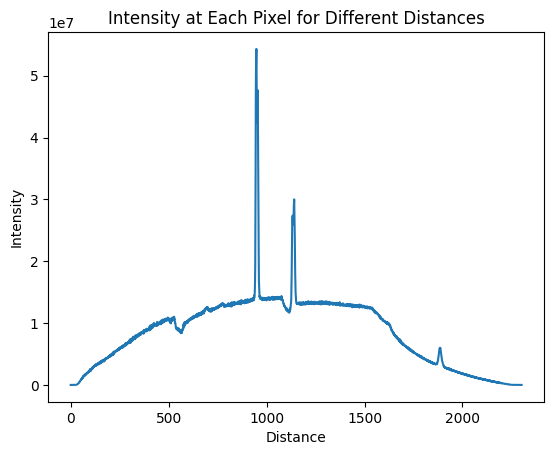


First 600 values of the sum of intensities array:
[-1.0000000e+00 -8.0000000e+00 -1.2000000e+01 -1.6000000e+01
 -3.2000000e+01 -2.8000000e+01 -4.0000000e+01 -4.0000000e+01
 -4.8000000e+01 -6.8000000e+01 -5.6000000e+01 -7.2000000e+01
 -6.8000000e+01 -8.8000000e+01 -8.8000000e+01 -8.4000000e+01
 -1.1200000e+02  3.5140000e+03  7.7500000e+03  8.5290000e+03
  8.6350000e+03  9.4810000e+03  1.1339000e+04  1.1979000e+04
  1.2329000e+04  1.5192000e+04  1.4855000e+04  1.6350000e+04
  2.2270000e+04  2.6508000e+04  3.9450000e+04  4.8153000e+04
  5.8672000e+04  8.1742000e+04  1.0389800e+05  1.2465000e+05
  1.4877500e+05  1.7030200e+05  2.1613100e+05  2.3179000e+05
  2.9421500e+05  2.9732800e+05  3.5801700e+05  4.0960200e+05
  4.1905700e+05  5.0093600e+05  4.9329600e+05  5.9564700e+05
  6.2337300e+05  6.5844700e+05  7.1561300e+05  7.4997200e+05
  8.4688800e+05  7.9167800e+05  8.8213800e+05  9.6194900e+05
  9.4942300e+05  1.0821530e+06  9.7695200e+05  1.1905560e+06
  1.1804140e+06  1.1536310e+06  1.

In [22]:
sumOfIntensity = calculate_sum_of_intensity(results)

# Print the sum of intensities array
print("\nSum of intensities array:", sumOfIntensity)

# Plot intensity values at each pixel for different distances
plot_intensity_values(sumOfIntensity)

print("\nFirst 600 values of the sum of intensities array:")
print(sumOfIntensity[:600])